In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
from matplotlib import pyplot as plt

**Задача 1**

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

In [25]:
X = 80
n = 256
sigma = 16
alpha = 1 - 0.95


Т.к. сигма известна, используем нормальное распределение
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}},$$

In [26]:
def interval(X, t_left, t_right , n):
    i_left = X + t_left*(sigma/(np.sqrt(n)))
    i_right = X + t_right*(sigma/(np.sqrt(n)))
    return i_left, i_right
    

In [27]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)
t1, t2

(-1.959963984540054, 1.959963984540054)

In [28]:
z = interval(X, t1, t2, n)
z

(78.04003601545995, 81.95996398454005)

Таким образом доверительный интервал 95% математического ожидания составляет от 78.04 до 81.96 

**Задача 2**

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

In [29]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
n = samples.size
X=samples.mean()

In [30]:
alpha = 0.01
mu = 200
sigma_x= samples.std(ddof=1)

Т.к. дисперсия неизвестна будем использовать t-критерий.
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}},$$


In [31]:
def t_value (X, mu, sigma_x, n):
    t = (X - mu)/((sigma_x/np.sqrt(n)))
    return t

Определяем левую и правую границы

In [32]:
t1 = stats.t.ppf(alpha / 2, df=n - 1)
t1

-3.2498355440153697

In [33]:
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)
t2

3.2498355440153697

In [34]:
T = t_value(X, mu, sigma_x, n)
T

-1.0651074037450896

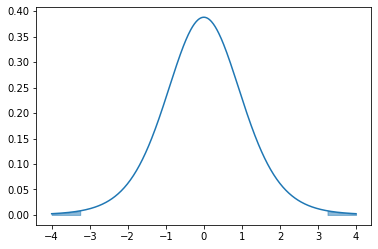

In [36]:
ox = np.linspace(-4, 4, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-4, t1, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 4, 100)
oy_right = stats.t.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Т.к. величина T не находится внутри критичекой области, отвергать нулевую гипотезу нельзя.

Нахождение величины P

In [38]:
p_left = stats.t.cdf(t_value(X, mu, sigma_x, n), df=n - 1)
p_right = 1 - stats.t.cdf(t_value(X, mu, sigma_x, n), df=n - 1)

pvalue = 2 * min(p_left, p_right)

pvalue

0.3145666035247285

**Задача 3**

Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

In [3]:
alpha = 0.025
n = 100
var = 4
mu = 17
X=17.5

В качестве нулевой гипотезы принимаем, что среднем значеним является 17 мм.

т.к. дисперсия известна, то можно найти среднее квадратичное отклонение

In [4]:
sigma = np.sqrt(var)

Можем использовать нормальное распределение

In [5]:
def normal_z(X, mu, sigma , n):
    Z= (X-mu)/(sigma/(np.sqrt(n)))
    return Z

In [6]:
Z = normal_z(X, mu, sigma, n)
Z

2.5

In [8]:
P_right = 1 - stats.norm.cdf(Z)
P_right

0.006209665325776159

Уровень значимости alpha=0.025, что больше, чем полученное P значение = 0.007.  
Следовательно, нулевая гипотеза не подтверждается.

**Задача 4 (Дополнительно)**

Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

In [10]:
samples_four = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134, 
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ])

In [11]:
def hi_stat(n, sample_var, var):
    H = (n - 1)*sample_var/var
    return H

In [12]:
def sample_vars(array):
    sample_var = array.var(ddof=1)
    return sample_var

In [13]:
#def test_var(array):
#    X = array.mean()    
#    n = array.size    
#    values = np.array([])
#    for elem in array:
#        value = (elem - X)**2        
#        values = np.append(values, value)
#    variance = values.sum()/(n - 1)
#    return variance
#test_var(samples_four)    

In [14]:
alpha = 0.05
var = 0.0625

In [15]:
sigma = np.sqrt(var)
sigma

0.25

In [16]:
X = samples_four.mean()
X

1.1084541666666665

In [17]:
n = samples_four.size
n

24

In [18]:
sample_var = sample_vars(samples_four)
sample_var

0.07804495041666669

In [19]:
hi = hi_stat(n, var, sample_var)
hi

18.418872615402652

In [138]:
t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t1

11.688551922452438

In [139]:
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
t2

38.0756272503558

Значение статистики hi=18.42, находится внутри интервала между правым и левым квантилями.
Можно считать, что нулевая гипотеза верна.